In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import statsmodels.api as smd
import statsmodels.api as stats
import scipy.stats as st

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('F:/project_data_ science/data_2_var.csv',names=['input_','output_'])

In [3]:
df.describe()

,input_,output_
count,1111.000000,1111.000000
mean,6.783026,-26.187358
std,79.383668,69.794973
min,-134.962839,-132.422167
25%,-53.521987,-77.000000
50%,15.737782,-46.072638
75%,76.134647,7.435231
max,134.605775,134.425495


In [4]:
# for remove the outlier
q=df['input_'].quantile(0.65)

df1=df[df['input_']>q]
df1

,input_,output_
255,55.444497,-47.439608
256,55.475282,-72.980434
267,58.915790,-63.866634
268,63.249836,-44.392207
270,52.633331,-51.000000
...,...,...
1067,134.605775,123.619680
1068,116.633331,118.000000
1069,115.862302,118.564590
1070,117.366199,99.544820


In [5]:
df1.shape

(389, 2)

In [6]:
# for chechking missing value and data tpye
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 255 to 1071
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   input_   389 non-null    float64
 1   output_  389 non-null    float64
dtypes: float64(2)
memory usage: 9.1 KB


<AxesSubplot:xlabel='input_', ylabel='Density'>

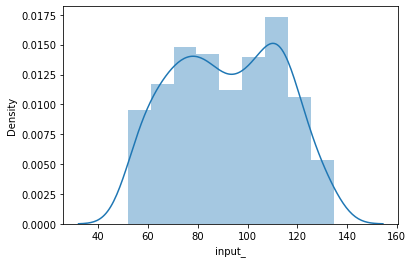

In [7]:
sns.distplot(df1['input_'])

<AxesSubplot:xlabel='output_', ylabel='Density'>

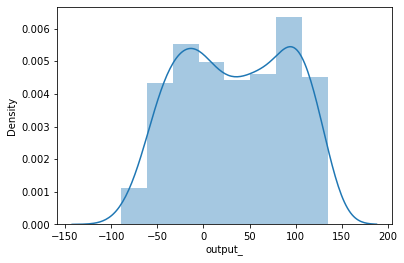

In [8]:
sns.distplot(df1['output_'])

In [9]:
df1.quantile(0.10)

input_     62.309994
output_   -44.665443
Name: 0.1, dtype: float64

In [10]:
df1.describe()

,input_,output_
count,389.000000,389.000000
mean,91.832860,34.424672
std,21.735686,58.340446
min,51.855230,-89.164895
25%,73.813291,-15.000000
50%,92.316609,35.543284
75%,111.235509,87.925087
max,134.605775,134.425495


In [11]:
from sklearn.linear_model import LinearRegression

reg= LinearRegression(n_jobs=12)


Text(0, 0.5, 'output')

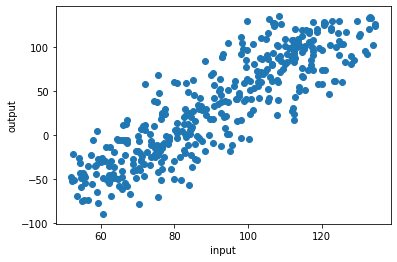

In [12]:
plt.scatter(df1.input_,df1.output_)
plt.xlabel("input")
plt.ylabel("output")

this  is show relation between input and output

In [13]:
new_df=df1.drop(['output_'],axis=1)
new_df

,input_
255,55.444497
256,55.475282
267,58.915790
268,63.249836
270,52.633331
...,...
1067,134.605775
1068,116.633331
1069,115.862302
1070,117.366199


In [14]:
output_=df1['output_']

In [15]:
reg.fit(new_df,output_)

LinearRegression(n_jobs=12)

In [16]:
reg.predict([[123]])

array([107.79476535])

In [17]:
reg.coef_

array([2.35408488])

In [18]:
reg.intercept_

-181.75767501816495

In [19]:
reg.score(new_df,output_)
data={'cofficient':reg.coef_,
     'intercept':reg.intercept_}

In [20]:
pd.DataFrame(data)

,cofficient,intercept
0,2.354085,-181.757675
